## Python statistics essential training - 03_03_histograms

Standard imports

In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
china1965 = pd.read_csv('income-1965-china.csv')
china2015 = pd.read_csv('income-2015-china.csv')
usa1965 = pd.read_csv('income-1965-usa.csv')
usa2015 = pd.read_csv('income-2015-usa.csv')

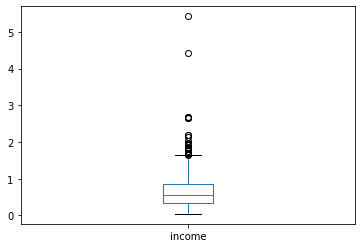

In [6]:
#boxplot visualizes coverage intervals, outside the box & whiskers are fliers (not typical, possible outliers)
china1965.income.plot(kind='box')

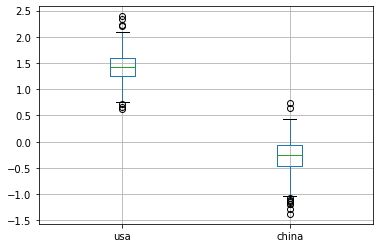

In [7]:
#comparison of usa and china with log scale
pd.DataFrame({'usa': usa1965.log10_income, 'china': china1965.log10_income}).boxplot()

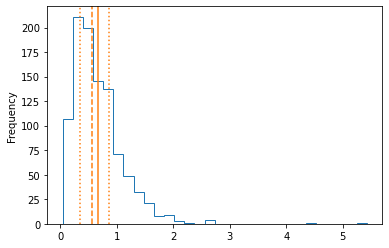

In [9]:
#histogam of china
china1965.income.plot(kind='hist',histtype='step',bins=30)

#descriptive stats overlayed on hist of china
pp.axvline(china1965.income.mean(),c='C1')
pp.axvline(china1965.income.median(),c='C1',linestyle='--')
pp.axvline(china1965.income.quantile(0.25),c='C1',linestyle=':')
pp.axvline(china1965.income.quantile(0.75),c='C1',linestyle=':')

(0.0, 3.0, 0.0, 1.2342999882944066)

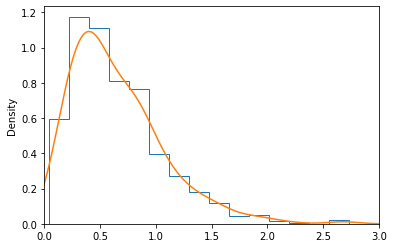

In [13]:
# intensity plot over hist for china1965 (as above)
#to compare hist and intensity, normalize hist so area under it is =1 like in the intensity plot
china1965.income.plot(kind='hist',histtype='step',bins=30,density=True)
china1965.income.plot.density(bw_method=0.3)
#set range of xaxis
pp.axis(xmin=0,xmax=3)

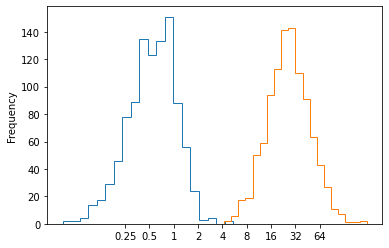

In [14]:
# compare hists for china and us in 1965
#poorest in us are richer than richest in china
china1965.log10_income.plot.hist(histtype='step',bins=20)
usa1965.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

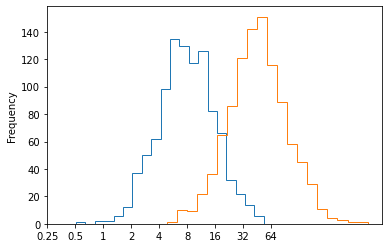

In [16]:
# compare hists for china and us in 2015
# both are richer and there is overlap in income range
china2015.log10_income.plot.hist(histtype='step',bins=20)
usa2015.log10_income.plot.hist(histtype='step',bins=20)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);

In [18]:
# rescale hist by relative sizes of populations
# data from gapminder and query to select info of interest
gapminder = pd.read_csv('gapminder.csv')
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)
print(china_pop2015, ' ',usa_pop2015)

1376048943.0   321773631.0


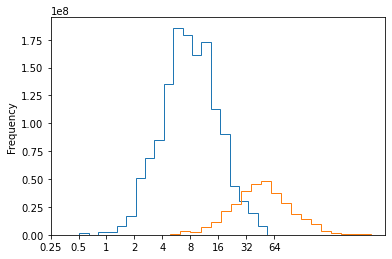

In [19]:
#weighted hist by creating a column with the weights
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

# plot of hist with weights, purchasing power in richer part of china
china2015.log10_income.plot.hist(histtype='step',bins=20,weights=china2015.weight)
usa2015.log10_income.plot.hist(histtype='step',bins=20,weights=usa2015.weight)

levels = [0.25,0.5,1,2,4,8,16,32,64]
pp.xticks(np.log10(levels),levels);